In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import recall_score

In [2]:
df = pd.read_csv("Datos/Entrada_limpia.csv")

anomalias = pd.read_csv("Datos/anomalias.csv", header=None)
anomalias.columns= ['scores']

df['scores'] = anomalias['scores']

In [3]:
df = df.set_index('fecha')
df.head(2)

,FormacionNIRHumedadPV,FibraticPredNIRHumedadPV,Hum_Pred,Etapa2MWHumedadPV,ExtractorVelocidadPV,FormacionAlturaMantaPV,FormadoraVelocidadPV,FormadoraSiloNivel,SiloFibraNivel,SiloFibraVelocidadPV,...,FormacionNIRHumedadPV_std,FibraticPredNIRHumedadPV_std,Hum_Pred_std,Etapa2MWHumedadPV_std,Negro,CurvaCola,Congelado,Hum,Anomalia,scores
fecha,,,,,,,,,,,,,,,,,,,,,
2021-02-10 10:00:00,0.0,6.465569,10.920920,13.141570,50.55861,120.965,37.6,70.741330,12.590190,26.1,...,0.0,0.022282,0.163959,0.221663,1,0,1,0,1,0.5
2021-02-10 10:01:00,0.0,6.355772,10.604865,12.412745,50.55929,112.285,29.6,72.317965,9.990133,21.4,...,0.0,0.029155,0.060918,0.151328,1,0,1,0,1,0.5


<AxesSubplot:>

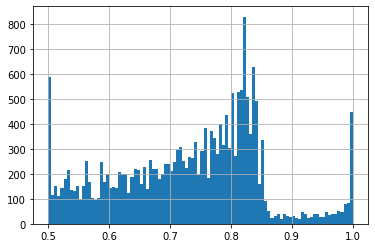

In [4]:
df['scores'].hist(bins=100)

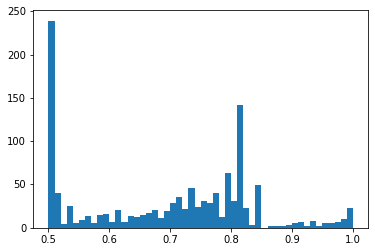

In [5]:
n, bins, patches = plt.hist(df[df['Anomalia']==1]['scores'], bins=50)
plt.show()

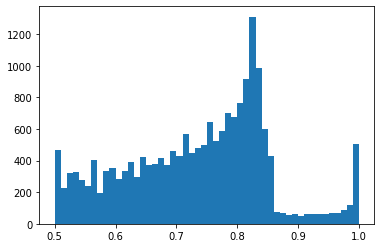

In [6]:
plt.hist(df[df['Anomalia']==0]['scores'], bins=50)
plt.show()

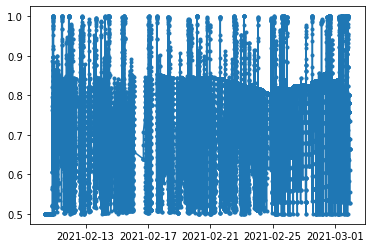

In [7]:
df.index = pd.to_datetime(df.index)
plt.plot(df.index, df.scores,'.-')

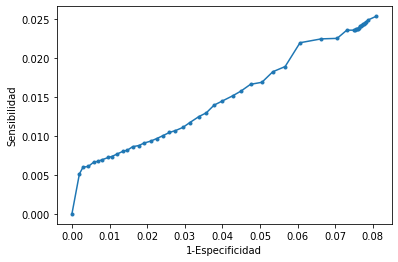

In [8]:
valores = np.array([])
sensibilidades = np.array([])
especificidades = np.array([])
for i in bins:
    df['Y_pred'] = df['scores'].map(lambda x: 1 if x < i else 0)
    valores = np.append(valores,i)
    sensibilidades = np.append(sensibilidades,recall_score(df['Anomalia'],df['Y_pred']))
    especificidades = np.append(especificidades,recall_score(df['Anomalia'],df['Y_pred'], pos_label=0))

plt.plot(1 - especificidades, sensibilidades,'.-')
plt.ylabel('Sensibilidad')
plt.xlabel('1-Especificidad')
plt.show()

In [9]:
df['Y_pred'] = df['scores'].map(lambda x: 1 if x>bins[2] else 0)

In [10]:
from sklearn.metrics import recall_score
lista_anomalias = ['Negro', 'CurvaCola', 'Congelado', 'Hum', 'Anomalia']

sensibilidad = recall_score(df['Anomalia'],df['Y_pred'])
negro_sen = recall_score(df['Negro'],df['Y_pred'])
curvacola_sen = recall_score(df['CurvaCola'],df['Y_pred'])
congelado_sen = recall_score(df['Congelado'],df['Y_pred'])
hum_sen = recall_score(df['Hum'],df['Y_pred'])

metricas_anomalias = pd.DataFrame([negro_sen,curvacola_sen, congelado_sen,hum_sen, sensibilidad], index=lista_anomalias, columns=['Sensibilidad']).T
metricas_anomalias

,Negro,CurvaCola,Congelado,Hum,Anomalia
Sensibilidad,0.0,0.027877,0.00962,0.01377,0.019351


In [11]:
df.loc[:,['Negro','CurvaCola','Congelado','Hum','Anomalia','scores','Y_pred']].to_csv('HTM_completo.csv')